In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

In [ ]:
file_path = 'diabetic_data.csv'
df = pd.read_csv(file_path)
#drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/MyDrive/diabetic_data.csv")
df.head(10)

Mounted at /content/drive


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


# **DATA CLEANING**

##DATA STRUCTURE ANALYSIS

In [ ]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 101766 rows and 50 columns


In [ ]:
# check for common placeholder values
placeholder_values = ['?', 'unknown', '','invalid']

# Creating a dictionary to hold columns and their respective counts of placeholder values
placeholder_counts = {col: sum(df[col].astype(str).isin(placeholder_values)) for col in df.columns}

placeholder_counts


{'encounter_id': 0,
 'patient_nbr': 0,
 'race': 2273,
 'gender': 0,
 'age': 0,
 'weight': 98569,
 'admission_type_id': 0,
 'discharge_disposition_id': 0,
 'admission_source_id': 0,
 'time_in_hospital': 0,
 'payer_code': 40256,
 'medical_specialty': 49949,
 'num_lab_procedures': 0,
 'num_procedures': 0,
 'num_medications': 0,
 'number_outpatient': 0,
 'number_emergency': 0,
 'number_inpatient': 0,
 'diag_1': 21,
 'diag_2': 358,
 'diag_3': 1423,
 'number_diagnoses': 0,
 'max_glu_serum': 0,
 'A1Cresult': 0,
 'metformin': 0,
 'repaglinide': 0,
 'nateglinide': 0,
 'chlorpropamide': 0,
 'glimepiride': 0,
 'acetohexamide': 0,
 'glipizide': 0,
 'glyburide': 0,
 'tolbutamide': 0,
 'pioglitazone': 0,
 'rosiglitazone': 0,
 'acarbose': 0,
 'miglitol': 0,
 'troglitazone': 0,
 'tolazamide': 0,
 'examide': 0,
 'citoglipton': 0,
 'insulin': 0,
 'glyburide-metformin': 0,
 'glipizide-metformin': 0,
 'glimepiride-pioglitazone': 0,
 'metformin-rosiglitazone': 0,
 'metformin-pioglitazone': 0,
 'change': 0,

In [ ]:
# Dropping the columns with a large number of placeholder values
columns_to_drop = ['weight']
df = df.drop(columns=columns_to_drop)

df['race'] = df['race'].replace(['?', 'unknown'], np.nan)

In [ ]:
placeholder_count = {col: sum(df[col].astype(str).isin(['No'])) for col in df.columns}
print(placeholder_count)

columns_to_drop2 = ['metformin', 'repaglinide', 'nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','insulin']
df = df.drop(columns=columns_to_drop2)
print(df.columns)


{'encounter_id': 0, 'patient_nbr': 0, 'race': 0, 'gender': 0, 'age': 0, 'admission_type_id': 0, 'discharge_disposition_id': 0, 'admission_source_id': 0, 'time_in_hospital': 0, 'payer_code': 0, 'medical_specialty': 0, 'num_lab_procedures': 0, 'num_procedures': 0, 'num_medications': 0, 'number_outpatient': 0, 'number_emergency': 0, 'number_inpatient': 0, 'diag_1': 0, 'diag_2': 0, 'diag_3': 0, 'number_diagnoses': 0, 'max_glu_serum': 0, 'A1Cresult': 0, 'metformin': 81778, 'repaglinide': 100227, 'nateglinide': 101063, 'chlorpropamide': 101680, 'glimepiride': 96575, 'acetohexamide': 101765, 'glipizide': 89080, 'glyburide': 91116, 'tolbutamide': 101743, 'pioglitazone': 94438, 'rosiglitazone': 95401, 'acarbose': 101458, 'miglitol': 101728, 'troglitazone': 101763, 'tolazamide': 101727, 'examide': 101766, 'citoglipton': 101766, 'insulin': 47383, 'glyburide-metformin': 101060, 'glipizide-metformin': 101753, 'glimepiride-pioglitazone': 101765, 'metformin-rosiglitazone': 101764, 'metformin-pioglita

In [ ]:
replaceDict = {
    '[0-10)' : 5,
    '[10-20)' : 15,
    '[20-30)' : 25,
    '[30-40)' : 35,
    '[40-50)' : 45,
    '[50-60)' : 55,
    '[60-70)' : 65,
    '[70-80)' : 75,
    '[80-90)' : 85,
    '[90-100)' : 95
}

df['age'] = df['age'].apply(lambda x : replaceDict[x] if x in replaceDict else 0)

print(df['age'].head())

df.dropna(inplace = True)
print('Total data = ', len(df))
print('Unique entries = ', len(np.unique(df['patient_nbr'])))
df.drop_duplicates(['patient_nbr'], keep = 'first', inplace = True)
print('Length after removing Duplicates:', len(df))

0     5
1    15
2    25
3    35
4    45
Name: age, dtype: int64
Total data =  99493
Unique entries =  69668
Length after removing Duplicates: 69668


In [ ]:
todrop=['encounter_id', 'patient_nbr']
df = df.drop(columns=todrop)

In [ ]:
df.groupby('readmitted').size()

readmitted
<30     6167
>30    21834
NO     41667
dtype: int64

In [ ]:
#ces disposition id sont celles liées au décès du patient, il n'y a donc pas de retour possible, on les enlève.
df=df.loc[~df.discharge_disposition_id.isin([11,13,24,19,20,21])]
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
0,Caucasian,Female,5,6,25,1,1,?,Pediatrics-Endocrinology,41,...,0,250.83,?,?,1,None,None,No,No,NO
1,Caucasian,Female,15,1,1,7,3,?,?,59,...,0,276,250.01,255,9,None,None,Ch,Yes,>30
2,AfricanAmerican,Female,25,1,1,7,2,?,?,11,...,1,648,250,V27,6,None,None,No,Yes,NO
3,Caucasian,Male,35,1,1,7,2,?,?,44,...,0,8,250.43,403,7,None,None,Ch,Yes,NO
4,Caucasian,Male,45,1,1,7,1,?,?,51,...,0,197,157,250,5,None,None,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,Caucasian,Female,75,1,1,7,9,?,?,50,...,0,574,574,250.02,9,None,>7,Ch,Yes,>30
101755,Other,Female,45,1,1,7,14,MD,?,73,...,0,592,599,518,9,None,>8,Ch,Yes,>30
101756,Other,Female,65,1,1,7,2,MD,?,46,...,1,996,585,403,9,None,None,No,Yes,>30
101758,Caucasian,Female,85,1,1,7,5,MC,?,76,...,0,292,8,304,9,None,None,Ch,Yes,NO


In [ ]:
#we want to encode the categorical data with one-hot encoding
cols_num = ['age','time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
            'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

cols_cat = ['race', 'gender',
            'max_glu_serum', 'A1Cresult', 'change', 'diabetesMed', 'payer_code']

df = df.replace(['?', 'unknown'], np.nan)
df['race'] = df['race'].fillna('UNK')
df['payer_code'] = df['payer_code'].fillna('UNK')
df['medical_specialty'] = df['medical_specialty'].fillna('UNK')

print('Number medical specialty:', df.medical_specialty.nunique())
df.groupby('medical_specialty').size().sort_values(ascending = False)

Number medical specialty: 71


medical_specialty
UNK                                 32828
InternalMedicine                    10308
Family/GeneralPractice               4865
Emergency/Trauma                     4378
Cardiology                           4125
                                    ...  
Proctology                              1
Perinatology                            1
Surgery-PlasticwithinHeadandNeck        1
Neurophysiology                         1
Dermatology                             1
Length: 71, dtype: int64

In [ ]:
top_10 = ['UNK', 'InternalMedicine', 'Emergency/Trauma',
          'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
          'Nephrology', 'Orthopedics',
          'Orthopedics-Reconstructive', 'Radiologist']

# make a new column with duplicated data
df['med_spec'] = df['medical_specialty'].copy()

# replace all specialties not in top 10 with 'Other' category
df.loc[~df.med_spec.isin(top_10), 'med_spec'] = 'Other'

df.groupby('med_spec').size()


med_spec
Cardiology                     4125
Emergency/Trauma               4378
Family/GeneralPractice         4865
InternalMedicine              10308
Nephrology                      782
Orthopedics                    1107
Orthopedics-Reconstructive     1002
Other                          5986
Radiologist                     804
Surgery-General                2156
UNK                           32828
dtype: int64

In [ ]:
print(df.columns)
df.head()

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'change',
       'diabetesMed', 'readmitted', 'med_spec'],
      dtype='object')


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,med_spec
0,Caucasian,Female,5,6,25,1,1,UNK,Pediatrics-Endocrinology,41,...,250.83,NaN,NaN,1,None,None,No,No,NO,Other
1,Caucasian,Female,15,1,1,7,3,UNK,UNK,59,...,276,250.01,255,9,None,None,Ch,Yes,>30,UNK
2,AfricanAmerican,Female,25,1,1,7,2,UNK,UNK,11,...,648,250,V27,6,None,None,No,Yes,NO,UNK
3,Caucasian,Male,35,1,1,7,2,UNK,UNK,44,...,8,250.43,403,7,None,None,Ch,Yes,NO,UNK
4,Caucasian,Male,45,1,1,7,1,UNK,UNK,51,...,197,157,250,5,None,None,Ch,Yes,NO,UNK


In [ ]:
cols_cat_num = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']
df[cols_cat_num] = df[cols_cat_num].astype('str')
df_cat = pd.get_dummies(df[cols_cat + cols_cat_num + ['med_spec']], drop_first = True)
df_cat.head()


,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,...,med_spec_Emergency/Trauma,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df=pd.concat([df,df_cat],axis=1)
cols_all_cat=list(df_cat.columns)
print(cols_all_cat)
df.head()

['race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_Male', 'gender_Unknown/Invalid', 'max_glu_serum_>300', 'max_glu_serum_None', 'max_glu_serum_Norm', 'A1Cresult_>8', 'A1Cresult_None', 'A1Cresult_Norm', 'change_No', 'diabetesMed_Yes', 'payer_code_CH', 'payer_code_CM', 'payer_code_CP', 'payer_code_DM', 'payer_code_HM', 'payer_code_MC', 'payer_code_MD', 'payer_code_MP', 'payer_code_OG', 'payer_code_OT', 'payer_code_PO', 'payer_code_SI', 'payer_code_SP', 'payer_code_UN', 'payer_code_UNK', 'payer_code_WC', 'admission_type_id_2', 'admission_type_id_3', 'admission_type_id_4', 'admission_type_id_5', 'admission_type_id_6', 'admission_type_id_7', 'admission_type_id_8', 'discharge_disposition_id_10', 'discharge_disposition_id_12', 'discharge_disposition_id_14', 'discharge_disposition_id_15', 'discharge_disposition_id_16', 'discharge_disposition_id_17', 'discharge_disposition_id_18', 'discharge_disposition_id_2', 'discharge_disposition_id_22', 'discharge_disposition_id_23', 'd

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,med_spec_Emergency/Trauma,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK
0,Caucasian,Female,5,6,25,1,1,UNK,Pediatrics-Endocrinology,41,...,0,0,0,0,0,0,1,0,0,0
1,Caucasian,Female,15,1,1,7,3,UNK,UNK,59,...,0,0,0,0,0,0,0,0,0,1
2,AfricanAmerican,Female,25,1,1,7,2,UNK,UNK,11,...,0,0,0,0,0,0,0,0,0,1
3,Caucasian,Male,35,1,1,7,2,UNK,UNK,44,...,0,0,0,0,0,0,0,0,0,1
4,Caucasian,Male,45,1,1,7,1,UNK,UNK,51,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df['output'] =(df.readmitted == '<30').astype('int')
col2use=cols_num+cols_all_cat
df_data=df[col2use+['output']]
df_data.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Asian,...,med_spec_Family/GeneralPractice,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK,output
0,5,1,41,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,15,3,59,0,18,0,0,0,9,0,...,0,0,0,0,0,0,0,0,1,0
2,25,2,11,5,13,2,0,1,6,0,...,0,0,0,0,0,0,0,0,1,0
3,35,2,44,1,16,0,0,0,7,0,...,0,0,0,0,0,0,0,0,1,0
4,45,1,51,0,8,0,0,0,5,0,...,0,0,0,0,0,0,0,0,1,0


**Visualisations**

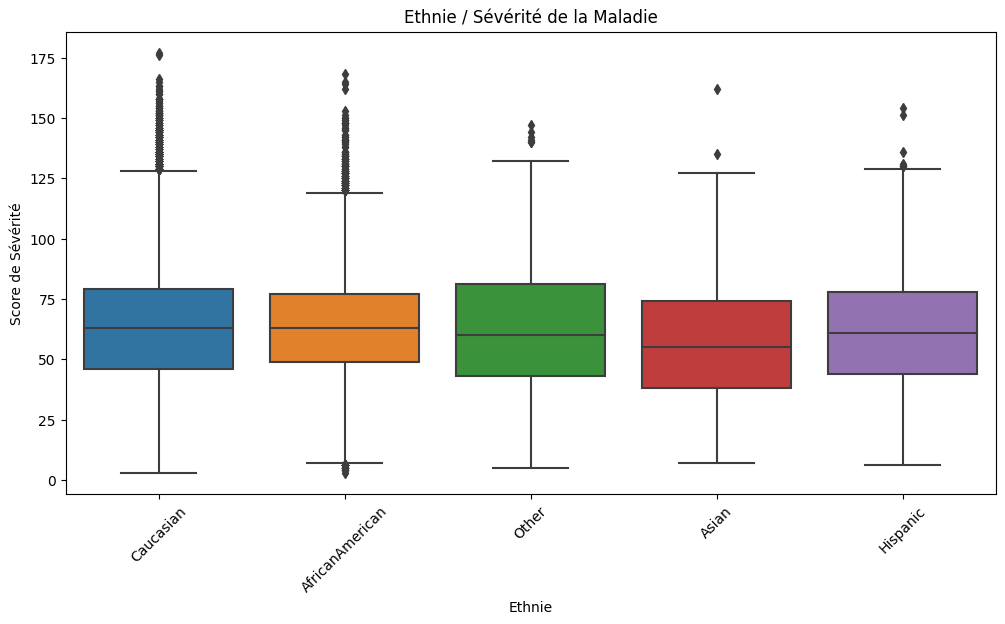

In [ ]:
import seaborn as sns

# Calcul du score de sévérité
df['severity_score'] = df['time_in_hospital'] + df['num_lab_procedures'] + df['num_medications']

# Visualisation
plt.figure(figsize=(12, 6))
sns.boxplot(x='race', y='severity_score', data=df)
plt.title('Ethnie / Sévérité de la Maladie')
plt.xlabel('Ethnie')
plt.ylabel('Score de Sévérité')
plt.xticks(rotation=45)
plt.show()

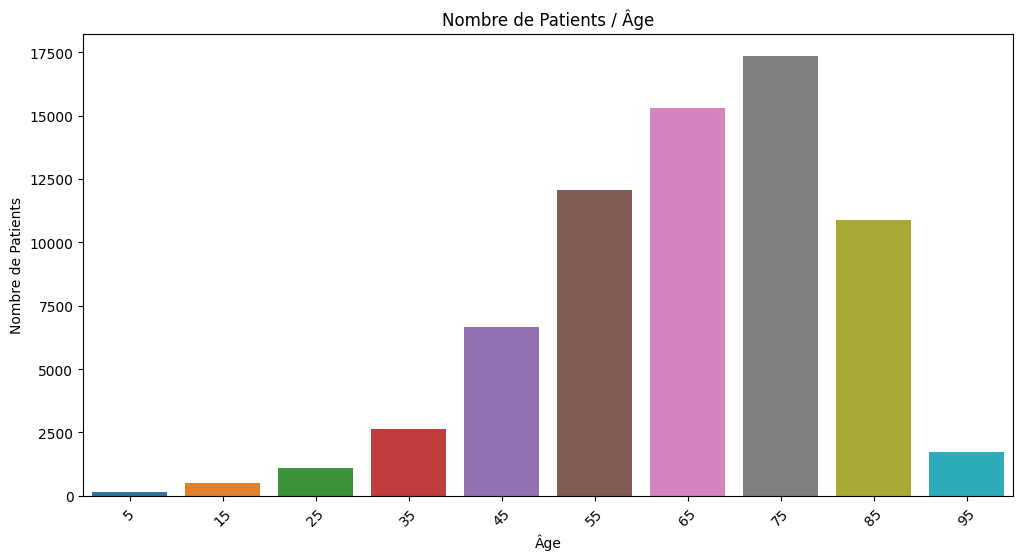

In [ ]:
# Calcul du nombre de patients par groupe d'âge
age_patient_count = df['age'].value_counts().sort_index()

# Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(x=age_patient_count.index, y=age_patient_count.values)
plt.title('Nombre de Patients / Âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de Patients')
plt.xticks(rotation=45)
plt.show()

<ipython-input-45-28d9f1e66054>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_non_encoded = df2.corr()


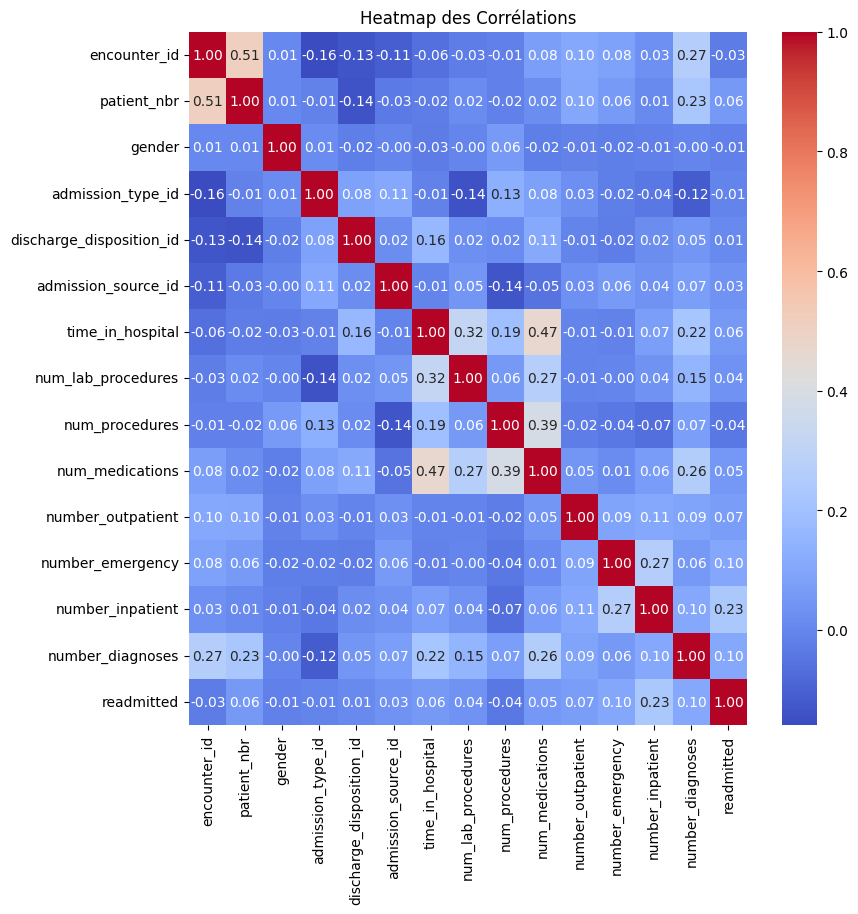

In [ ]:
# Pour la heatmap, nous utiliserons le dataset original sans la colonne 'readmitted' encodée

df2 = pd.read_csv('diabetic_data.csv')

# Encodage ordinal pour 'gender' et 'readmitted'
gender_mapping = {'Female': 0, 'Male': 1, 'Unknown/Invalid': 2}
readmitted_mapping = {'NO': 0, '>30': 1, '<30': 2}

df2['gender'] = df2['gender'].map(gender_mapping)
df2['readmitted'] = df2['readmitted'].map(readmitted_mapping)

# Calcul de la matrice de corrélations
correlation_matrix_non_encoded = df2.corr()

# Création de la heatmap
plt.figure(figsize=(9, 9))
sns.heatmap(correlation_matrix_non_encoded, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Heatmap des Corrélations')
plt.show()

num_procedures et num_lab_procedures ont une corrélation modérée (0.32). Cela pourrait signifier que les patients qui subissent plus de procédures ont également tendance à avoir plus de procédures de laboratoire, peut-être en raison de la complexité accrue de leur traitement.

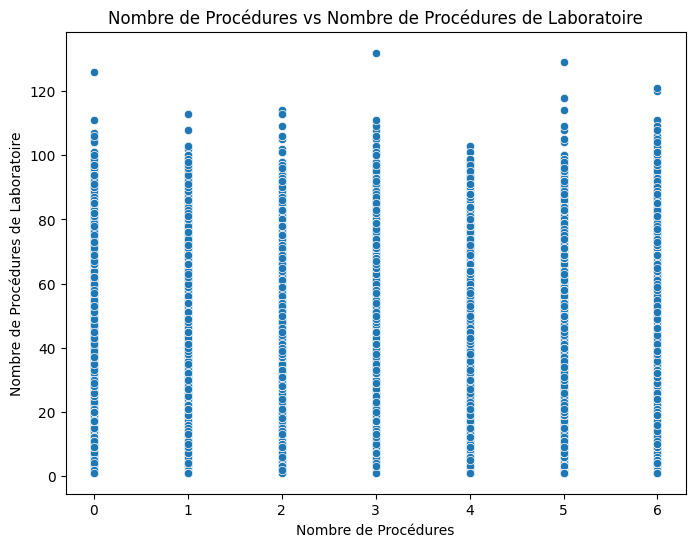

In [ ]:
# Visualisation de la corrélation

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='num_procedures', y='num_lab_procedures')
plt.title('Nombre de Procédures vs Nombre de Procédures de Laboratoire')
plt.xlabel('Nombre de Procédures')
plt.ylabel('Nombre de Procédures de Laboratoire')
plt.show()

num_medications et num_lab_procedures montrent une corrélation modérée (0.27), ce qui peut indiquer que les patients avec plus de procédures de laboratoire reçoivent également un plus grand nombre de médicaments.

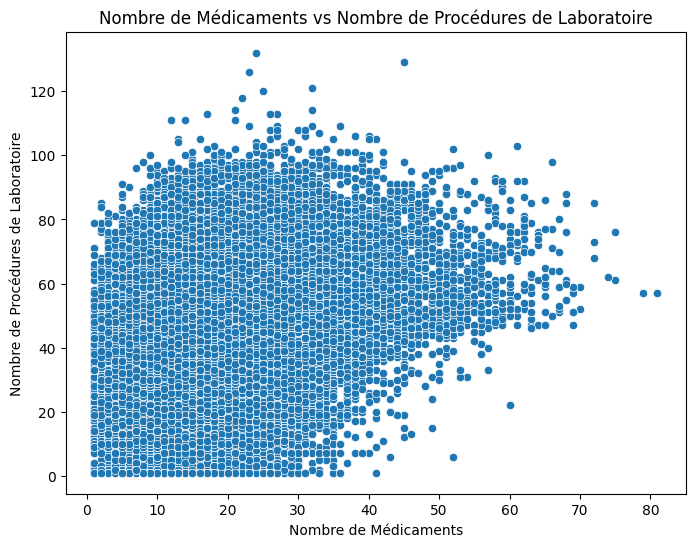

In [ ]:
# Visualisation de la corrélation

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='num_medications', y='num_lab_procedures')
plt.title('Nombre de Médicaments vs Nombre de Procédures de Laboratoire')
plt.xlabel('Nombre de Médicaments')
plt.ylabel('Nombre de Procédures de Laboratoire')
plt.show()

gender n'a pas de corrélation avec d'autres variables donc le sexe des patients n'a pas d'impact majeur sur les variables cliniques mesurées dans le dataset.

Intérressons-nous maintenant à notre Target.

<ipython-input-54-ca0bd3029b05>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_readmitted = df2.corr()['readmitted']


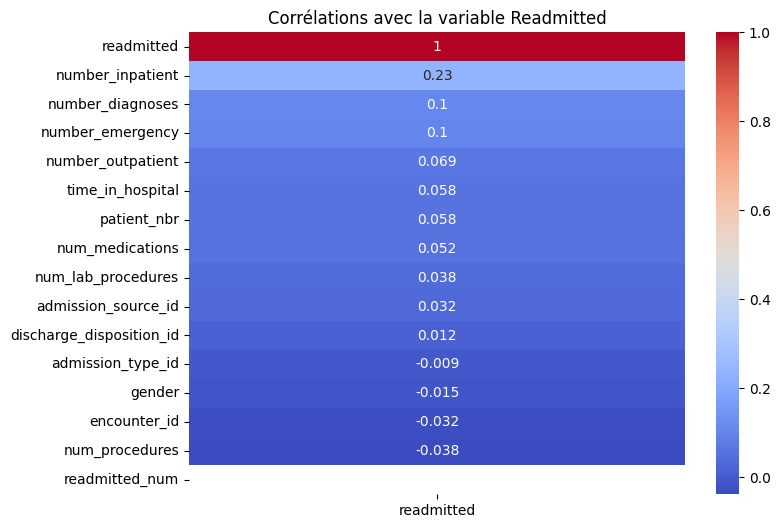

In [ ]:
# Calcul des corrélations avec 'Readmitted'
correlation_with_readmitted = df2.corr()['readmitted']

# Heatmap de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_readmitted.to_frame().sort_values(by='readmitted', ascending=False),
            cmap='coolwarm', annot=True, cbar=True)
plt.title('Corrélations avec la variable Readmitted')
plt.show()

number_inpatient montre la corrélation la plus élevée avec Readmitted (0.23), ce qui suggère que les patients ayant eu des admissions antérieures à l'hôpital ont une probabilité légèrement plus élevée d'être réadmis.

number_diagnoses et number_emergency présentent une corrélation de 0.1 avec Readmitted, indiquant une association faible entre ces variables et la réadmission.

gender et num_procedures présentent des corrélations négatives faibles avec Readmitted. Cela signifie que ces variables ne sont pas directement liées à la probabilité de réadmission.

In [ ]:
# Création de nouvelles variables

# Charge Médicamenteuse Totale
df2['medication_load'] = df['num_medications'] * df['time_in_hospital']

# Score de Complexité du Patient
df2['patient_complexity'] = df['number_diagnoses'] + df['num_procedures'] + df['number_inpatient']

# Ratio des Visites d'Urgence
df2['emergency_visit_ratio'] = df['number_emergency'] / (df['number_outpatient'] + 1)

# Calcul les corrélations avec 'Readmitted'

correlation_with_readmitted = df2[['readmitted', 'medication_load', 'patient_complexity', 'emergency_visit_ratio']].corr()

# Affichage des corrélations
correlation_with_readmitted

,readmitted,medication_load,patient_complexity,emergency_visit_ratio
readmitted,1.000000,0.056469,0.092316,0.062799
medication_load,0.056469,1.000000,0.385442,-0.006563
patient_complexity,0.092316,0.385442,1.000000,0.037619
emergency_visit_ratio,0.062799,-0.006563,0.037619,1.000000


En résumé, cette nouvelle analyse suggère qu'aucune de ces trois variables n'est fortement corrélée avec l'état de réadmission des patients dans cet ensemble de données. Il est important de noter que ces résultats sont préliminaires et qu'une analyse statistique plus approfondie pourrait être nécessaire pour tirer des conclusions définitives.
Pour celà nous allons donc tester des modèles de machine learning.

### Machine Learning


In [ ]:
# shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

# Save 30% of the data as validation and test data
df_valid_test = df_data.sample(frac=0.30, random_state=42)
print('Split size: {:.3f}'.format(len(df_valid_test) / len(df_data)))

df_test = df_valid_test.sample(frac=0.5, random_state=42)
df_valid = df_valid_test.drop(df_test.index)

# use the rest of the data as training data
df_train_all = df_data.drop(df_valid_test.index)

def calc_prevalence(y_actual):
    return sum(y_actual) / len(y_actual)

test_prevalence = calc_prevalence(df_test['output'].values)
valid_prevalence = calc_prevalence(df_valid['output'].values)
train_all_prevalence = calc_prevalence(df_train_all['output'].values)

print(f"Test prevalence (n = {len(df_test['output'])}):{test_prevalence:.3f}")
print(f"Valid prevalence (n = {len(df_valid['output'])}):{valid_prevalence:.3f}")
print(f"Train all prevalence (n = {len(df_train_all['output'])}):{train_all_prevalence:.3f}")


rows_pos = df_train_all['output'] == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)], axis = 0)

df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print("Train balanced prevalence (n = {}):{:.3f}".format(len(df_train), calc_prevalence(df_train['output'].values)))

X_train = df_train[col2use].values
X_train_all = df_train_all[col2use].values
X_valid = df_valid[col2use].values

y_train = df_train['output'].values
y_valid = df_valid['output'].values

print('Training All shapes:', X_train_all.shape)
print('Training shapes:', X_train.shape, y_train.shape)
print('Validation shapes:', X_valid.shape, y_valid.shape)




Split size: 0.300
Test prevalence (n = 10251):0.092
Valid prevalence (n = 10251):0.088
Train all prevalence (n = 47839):0.090
Train balanced prevalence (n = 8614):0.500
Training All shapes: (47839, 92)
Training shapes: (8614, 92) (8614,)
Validation shapes: (10251, 92) (10251,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_all)

#import pickle

#scalerfile = 'scaler.sav'
#pickle.dump(scaler, open(scalerfile, 'wb'))
#scaler = pickle.load(open(scalerfile, 'rb'))

X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual == 0)

def print_report(y_actual, y_pred, thresh):
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:{:.3f}'.format(auc))
    print('accuracy:{:.3f}'.format(accuracy))
    print('recall:{:.3f}'.format(recall))
    print('precision:{:.3f}'.format(precision))
    print('specificity:{:.3f}'.format(specificity))
    print('prevalence:{:.3f}'.format(calc_prevalence(y_actual)))
    print(' ')
    return auc, accuracy, recall, precision, specificity


In [ ]:
thresh = 0.5

### Knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
knn_train_precision, knn_train_specificity = print_report(y_train, y_train_preds, thresh)

print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
knn_valid_precision, knn_valid_specificity = print_report(y_valid, y_valid_preds, thresh)

KNN
Training:
AUC:0.649
accuracy:0.599
recall:0.434
precision:0.648
specificity:0.732
prevalence:0.500
 
Validation:
AUC:0.637
accuracy:0.717
recall:0.447
precision:0.144
specificity:0.705
prevalence:0.088
 


### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

#test
y_train_preds_tree = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds_tree = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, \
tree_train_precision, tree_train_specificity = print_report(y_train, y_train_preds_tree, thresh)

print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, \
tree_valid_precision, tree_valid_specificity = print_report(y_valid, y_valid_preds_tree, thresh)


Decision Tree
Training:
AUC:0.733
accuracy:0.663
recall:0.535
precision:0.719
specificity:0.786
prevalence:0.500
 
Validation:
AUC:0.604
accuracy:0.677
recall:0.455
precision:0.128
specificity:0.694
prevalence:0.088
 


### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

#test
y_train_preds_rf = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds_rf = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, \
rf_train_precision, rf_train_specificity = print_report(y_train, y_train_preds_rf, thresh)

print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, \
rf_valid_precision, rf_valid_specificity = print_report(y_valid, y_valid_preds_rf, thresh)

#grid search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

Random Forest
Training:
AUC:0.691
accuracy:0.633
recall:0.587
precision:0.647
specificity:0.679
prevalence:0.500
 
Validation:
AUC:0.658
accuracy:0.626
recall:0.573
precision:0.131
specificity:0.631
prevalence:0.088
 
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; t

RandomForestClassifier(max_depth=20, min_samples_split=5, random_state=42)

we test the different algorithms

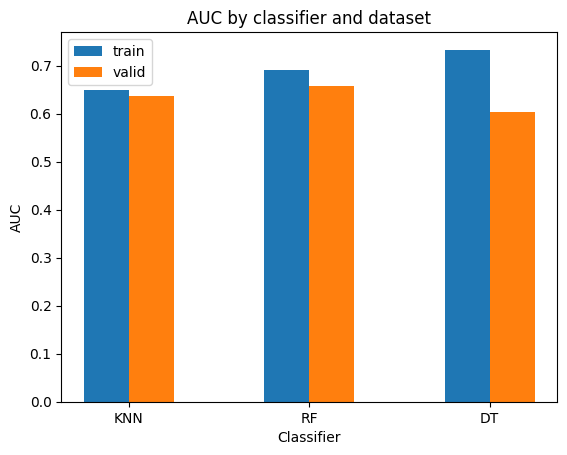

In [ ]:
auc_scores_train = {
    'KNN': knn_train_auc,
    'RF': rf_train_auc,
    'DT': tree_train_auc
}

auc_scores_valid = {
    'KNN': knn_valid_auc,
    'RF': rf_valid_auc,
    'DT': tree_valid_auc
}

# Names of classifiers
classifiers = ['KNN', 'RF', 'DT']

# Training AUC scores
train_auc = [auc_scores_train[clf] for clf in classifiers]

# Validation AUC scores
valid_auc = [auc_scores_valid[clf] for clf in classifiers]

# Set up the bar width
bar_width = 0.25

# Set up the index for the bars
index = range(len(classifiers))

# Plotting
fig, ax = plt.subplots()
train_bars = ax.bar(index, train_auc, bar_width, label='train')

# Calculate the position for the next set of bars
valid_index = [i + bar_width for i in index]
valid_bars = ax.bar(valid_index, valid_auc, bar_width, label='valid')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Classifier')
ax.set_ylabel('AUC')
ax.set_title('AUC by classifier and dataset')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(classifiers)
ax.legend()

plt.show()
